# 2.1.3 Machine Learning section.

>In this section, we will be using a less restrictive text pre-processing:

>* Porter stemmer.

>We will be using sklearn NaiveBayes Multinomial.

We have two possible labels:

`relevance` and `positivity`.

** Pros of using `relevance`**:

* There's no missing values. Out of 8,000 datapoints, only 9 are coded as `not sure` out of two other possible values `yes`, and `no`. I will reclassify `not sure` as `no`.

* This is a binary classification problem.

** Cons of using `relevance`**:

* Classes are imbalanced.

** Pros of using `positivity`**:

* This is a multiclass classification problem.

** Cons of using `positivity`**:

* We only have 1,420 datapoints out of 8,000 labeled.

* Inputting missing values as the mean introduces bias.

* There's no proper way of trying to recode the missing values as it's based on personal judgments.



In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import nltk
import nlp_ml_functions
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer, binarize
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
sns.set_style('white')

## Using `relevance` as labels.

### Loading dataset into a pandas dataframe.

In [3]:
economic_df = pd.read_pickle("full_df")

In [4]:
balanced_df = pd.read_pickle("balanced_df")

## 1- Creating models with unbalanced labels dataframe.

In [5]:
X_headline = economic_df['article_headline']
y_headline = economic_df['relevance']

In [6]:
X_train_headline, X_test_headline, y_train_headline, y_test_headline = train_test_split(X_headline, y_headline, test_size=0.3, random_state=42)

In [7]:
X_article = economic_df['article_text']
y_article = economic_df['relevance']

In [8]:
X_train_article, X_test_article, y_train_article, y_test_article = train_test_split(X_article, y_article, test_size=0.3, random_state=42)

### 1.1 - Applying CountVectorizer.

We will apply to `article_headline` and `article_text`.

In [9]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_stem)),('classifier', MultinomialNB())])

In [10]:
pipeline.fit(X_train_headline, y_train_headline)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [11]:
predictions = pipeline.predict(X_test_headline)

In [12]:
predictions_probability = pipeline.predict_proba(X_test_headline)

#### Model evaluation using headlines.

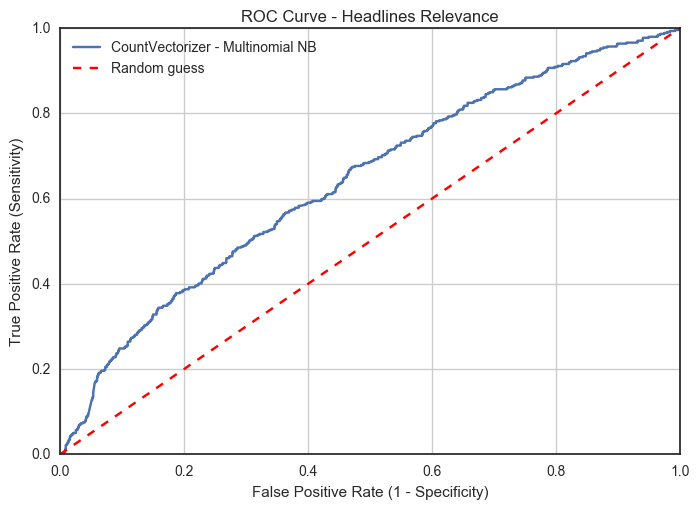

In [13]:
nlp_ml_functions.plot_roc(y_test_headline, predictions_probability[:,1], "CountVectorizer - Multinomial NB", "Headlines Relevance")

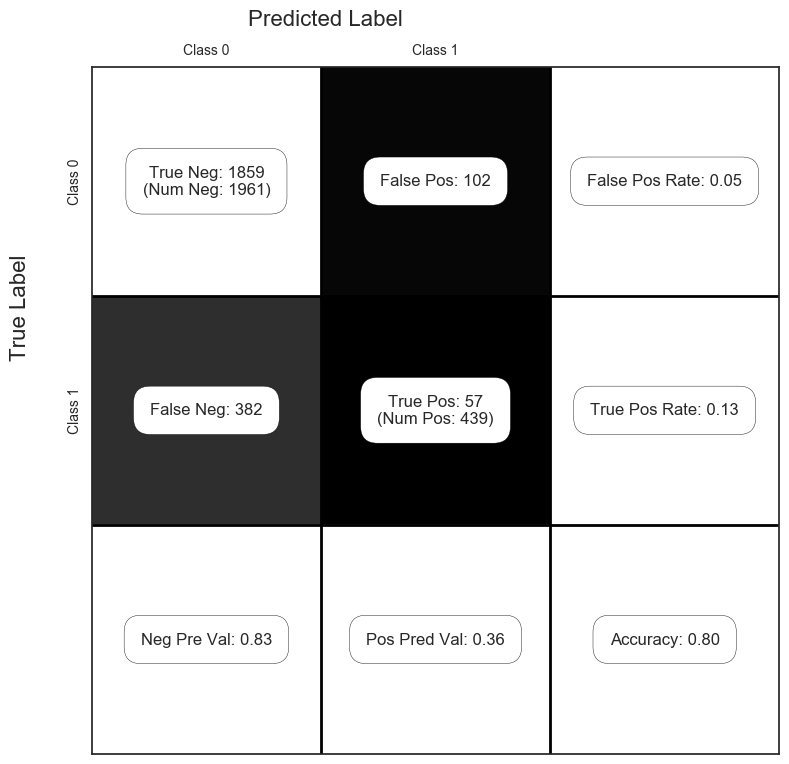

In [14]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_headline, predictions), ['Class 0', 'Class 1'])

In [15]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_headline, predictions)

Precision Score of Multinomial NB model: 35.85%

AUC: 53.89%

Accuracy Score of Multinomial NB model: 79.83%

Recall Score of Multinomial NB model: 12.98%

F1 Score of Multinomial NB model: 19.06%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.83      0.95      0.88      1961
          1       0.36      0.13      0.19       439

avg / total       0.74      0.80      0.76      2400



In [16]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [17]:
predictions = pipeline.predict(X_test_article)

In [18]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation using article.

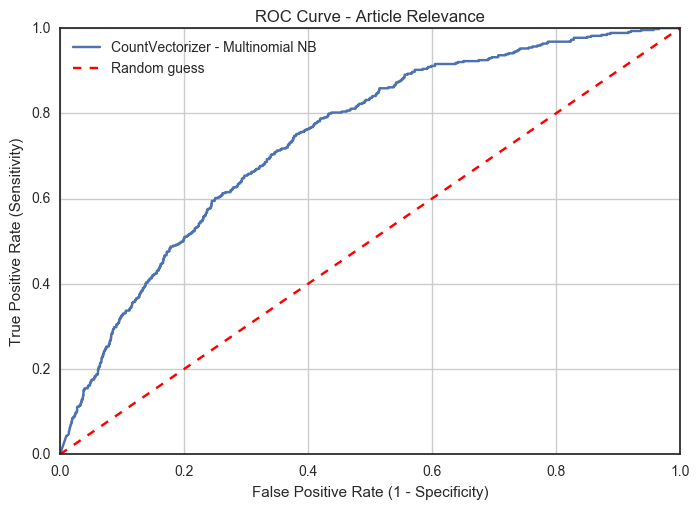

In [19]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - Multinomial NB", "Article Relevance")

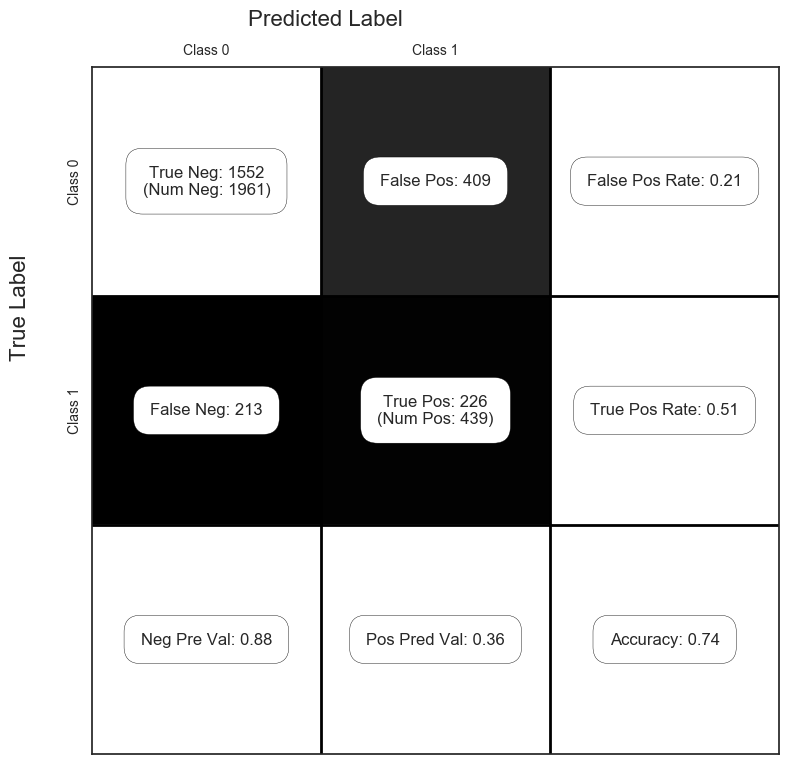

In [20]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [21]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_article, predictions)

Precision Score of Multinomial NB model: 35.59%

AUC: 65.31%

Accuracy Score of Multinomial NB model: 74.08%

Recall Score of Multinomial NB model: 51.48%

F1 Score of Multinomial NB model: 42.09%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.88      0.79      0.83      1961
          1       0.36      0.51      0.42       439

avg / total       0.78      0.74      0.76      2400



### 1.2 - Applying TfidfVectorizer.

In [22]:
pipeline = Pipeline([('bow', TfidfVectorizer(analyzer=nlp_ml_functions.process_dataframe_stem)),('classifier', MultinomialNB())])

In [23]:
pipeline.fit(X_train_headline, y_train_headline)

Pipeline(steps=[('bow', TfidfVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [24]:
predictions = pipeline.predict(X_test_headline)

In [25]:
predictions_probability = pipeline.predict_proba(X_test_headline)

#### Model evaluation using headlines.

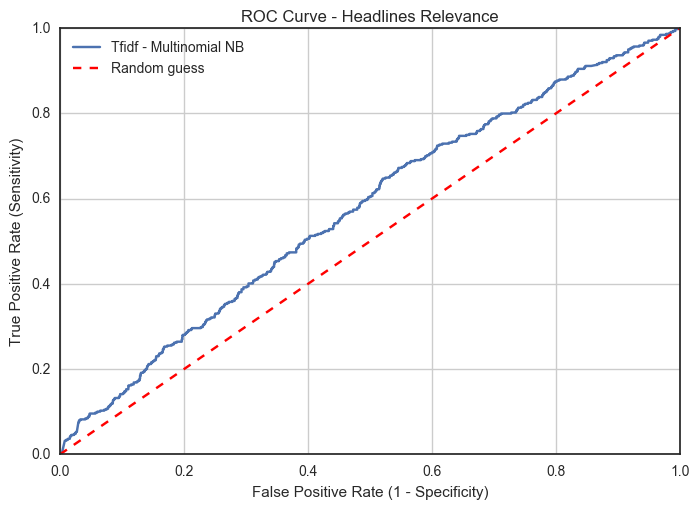

In [26]:
nlp_ml_functions.plot_roc(y_test_headline, predictions_probability[:,1], "Tfidf - Multinomial NB", "Headlines Relevance")

/Users/carles/DSCI6004-student/week_8/8_2_final_project/FinalProject-CPM/nlp_ml_functions.py:265: RuntimeWarning: invalid value encountered in true_divide
  'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),


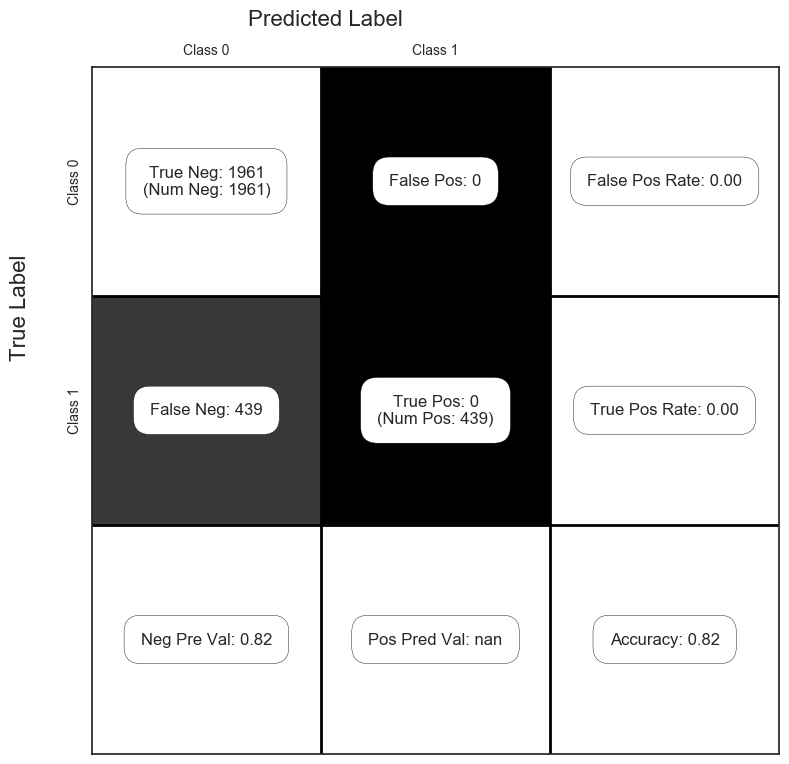

In [27]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_headline, predictions), ['Class 0', 'Class 1'])

In [28]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_headline, predictions)

Precision Score of Multinomial NB model: 0.00%

AUC: 50.00%

Accuracy Score of Multinomial NB model: 81.71%

Recall Score of Multinomial NB model: 0.00%

F1 Score of Multinomial NB model: 0.00%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.82      1.00      0.90      1961
          1       0.00      0.00      0.00       439

avg / total       0.67      0.82      0.73      2400



//anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', TfidfVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
predictions = pipeline.predict(X_test_article)

In [31]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation using article.

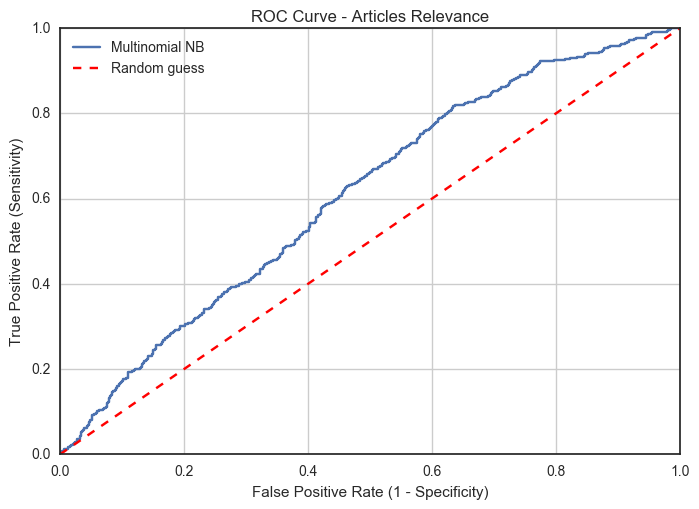

In [32]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "Multinomial NB", "Articles Relevance")

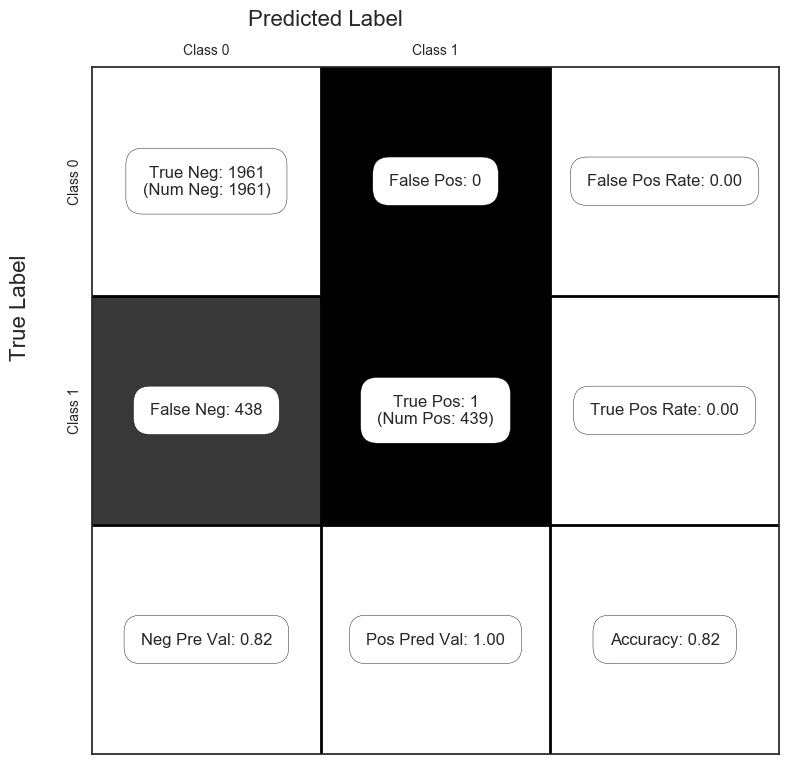

In [33]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [34]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_article, predictions)

Precision Score of Multinomial NB model: 100.00%

AUC: 50.11%

Accuracy Score of Multinomial NB model: 81.75%

Recall Score of Multinomial NB model: 0.23%

F1 Score of Multinomial NB model: 0.45%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.82      1.00      0.90      1961
          1       1.00      0.00      0.00       439

avg / total       0.85      0.82      0.74      2400



## 2- Creating models with balanced labels dataframe.

In [35]:
X_headline = balanced_df['article_headline']
y_headline = balanced_df['relevance']

In [36]:
X_train_headline, X_test_headline, y_train_headline, y_test_headline = train_test_split(X_headline, y_headline, test_size=0.3, random_state=42)

In [37]:
X_article = balanced_df['article_text']
y_article = balanced_df['relevance']

In [38]:
X_train_article, X_test_article, y_train_article, y_test_article = train_test_split(X_article, y_article, test_size=0.3, random_state=42)

### 2.1 - Applying CountVectorizer.

In [39]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_stem)),('classifier', MultinomialNB())])

In [40]:
pipeline.fit(X_train_headline, y_train_headline)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [41]:
predictions = pipeline.predict(X_test_headline)

In [42]:
predictions_probability = pipeline.predict_proba(X_test_headline)

#### Model evaluation using headlines.

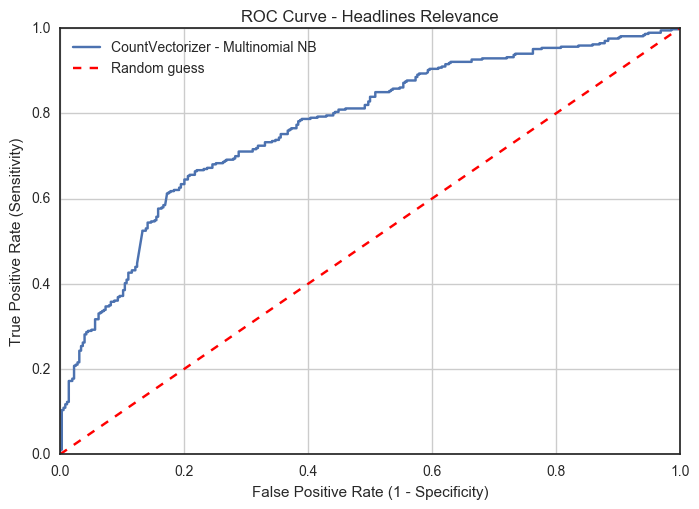

In [43]:
nlp_ml_functions.plot_roc(y_test_headline, predictions_probability[:,1], "CountVectorizer - Multinomial NB", "Headlines Relevance")

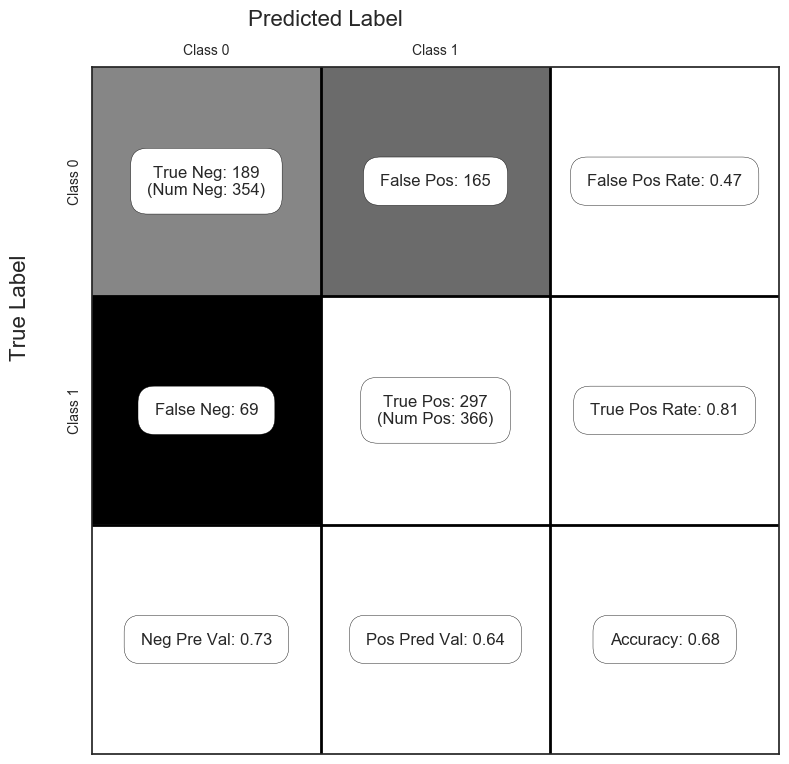

In [44]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_headline, predictions), ['Class 0', 'Class 1'])

In [45]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_headline, predictions)

Precision Score of Multinomial NB model: 64.29%

AUC: 67.27%

Accuracy Score of Multinomial NB model: 67.50%

Recall Score of Multinomial NB model: 81.15%

F1 Score of Multinomial NB model: 71.74%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.73      0.53      0.62       354
          1       0.64      0.81      0.72       366

avg / total       0.69      0.68      0.67       720



In [46]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [47]:
predictions = pipeline.predict(X_test_article)

In [48]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation using article.

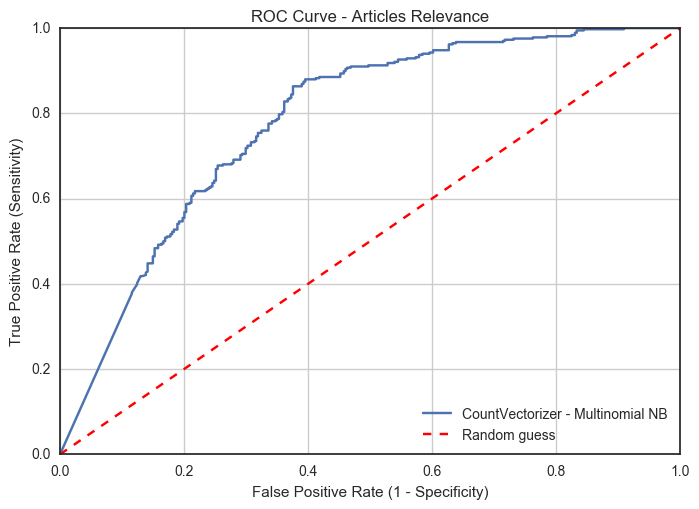

In [49]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - Multinomial NB", "Articles Relevance")

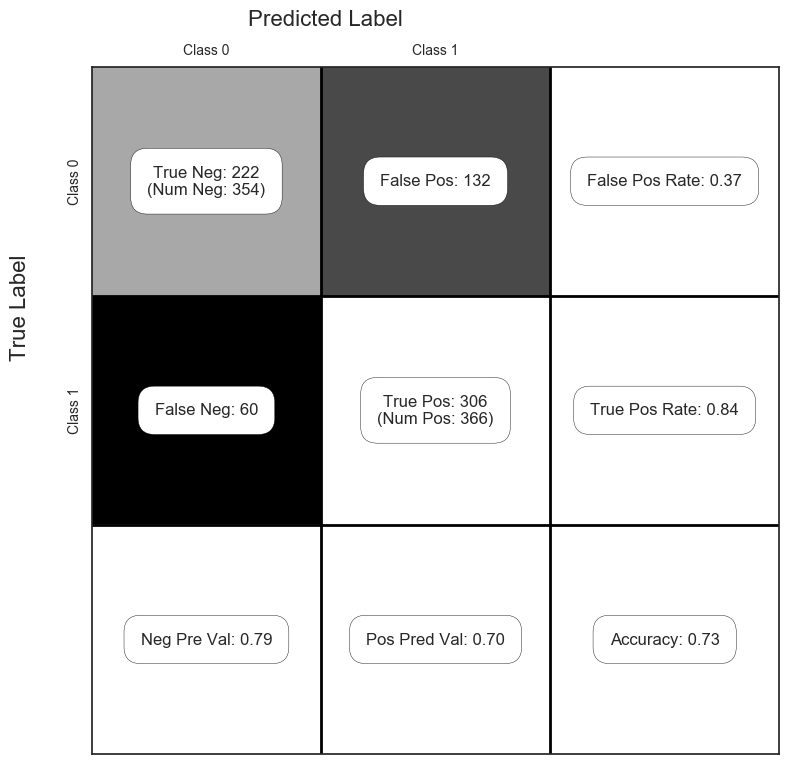

In [50]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [51]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_article, predictions)

Precision Score of Multinomial NB model: 69.86%

AUC: 73.16%

Accuracy Score of Multinomial NB model: 73.33%

Recall Score of Multinomial NB model: 83.61%

F1 Score of Multinomial NB model: 76.12%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.79      0.63      0.70       354
          1       0.70      0.84      0.76       366

avg / total       0.74      0.73      0.73       720



### 2.2 - Applying TfidfVectorizer.

In [52]:
pipeline = Pipeline([('bow', TfidfVectorizer(analyzer=nlp_ml_functions.process_dataframe_stem)),('classifier', MultinomialNB())])

In [53]:
pipeline.fit(X_train_headline, y_train_headline)

Pipeline(steps=[('bow', TfidfVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [54]:
predictions = pipeline.predict(X_test_headline)

In [55]:
predictions_probability = pipeline.predict_proba(X_test_headline)

#### Model evaluation using headlines.

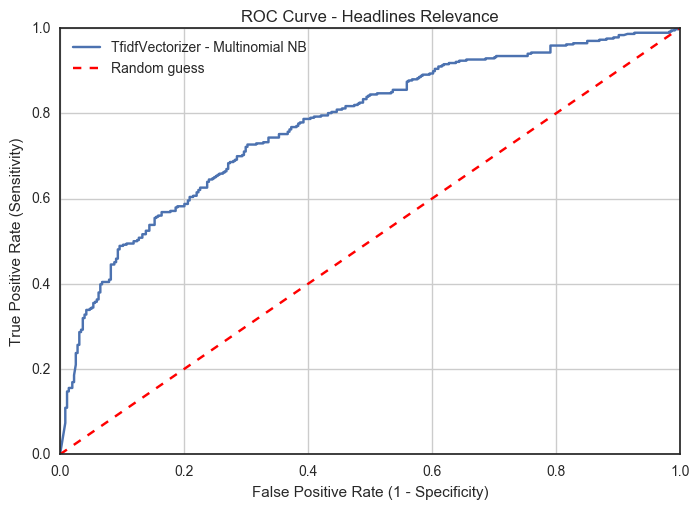

In [56]:
nlp_ml_functions.plot_roc(y_test_headline, predictions_probability[:,1], "TfidfVectorizer - Multinomial NB", "Headlines Relevance")

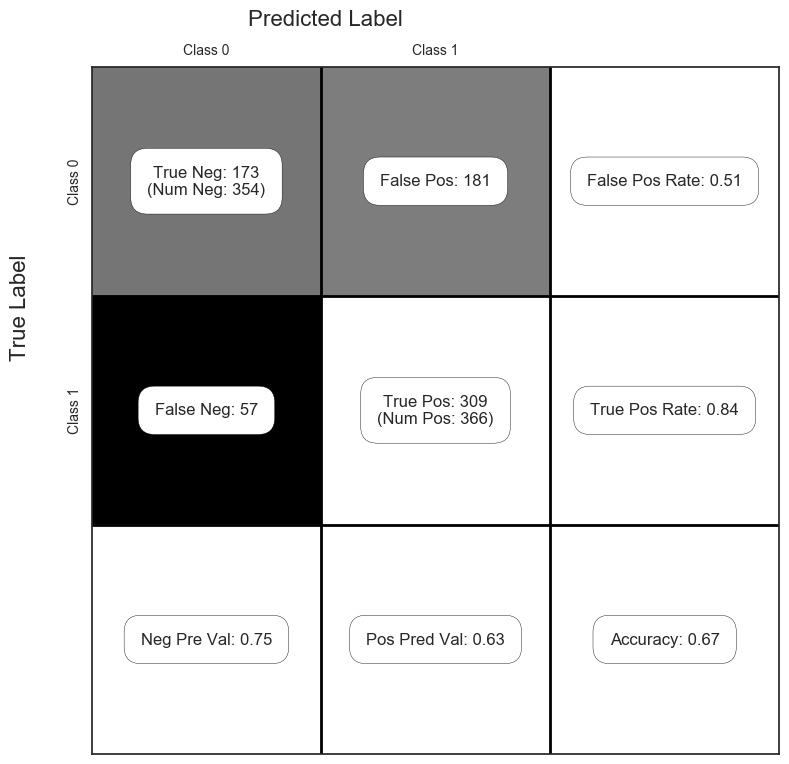

In [57]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_headline, predictions), ['Class 0', 'Class 1'])

In [58]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_headline, predictions)

Precision Score of Multinomial NB model: 63.06%

AUC: 66.65%

Accuracy Score of Multinomial NB model: 66.94%

Recall Score of Multinomial NB model: 84.43%

F1 Score of Multinomial NB model: 72.20%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.75      0.49      0.59       354
          1       0.63      0.84      0.72       366

avg / total       0.69      0.67      0.66       720



In [59]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', TfidfVectorizer(analyzer=<function process_dataframe_stem at 0x113dbdd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [60]:
predictions = pipeline.predict(X_test_article)

In [61]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation using article.

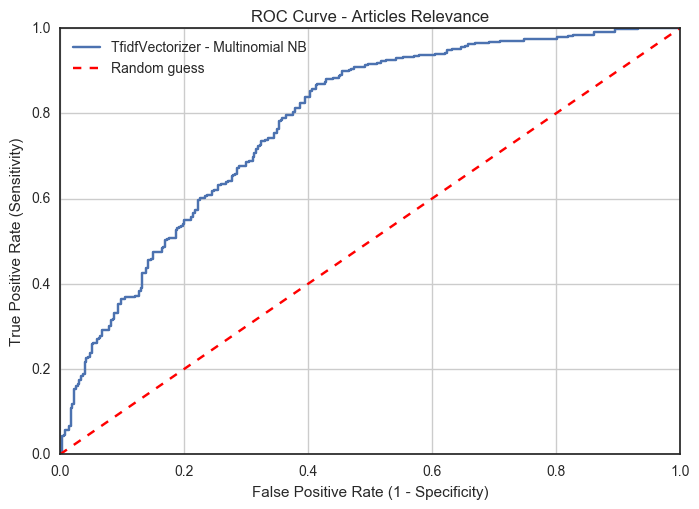

In [62]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "TfidfVectorizer - Multinomial NB", "Articles Relevance")

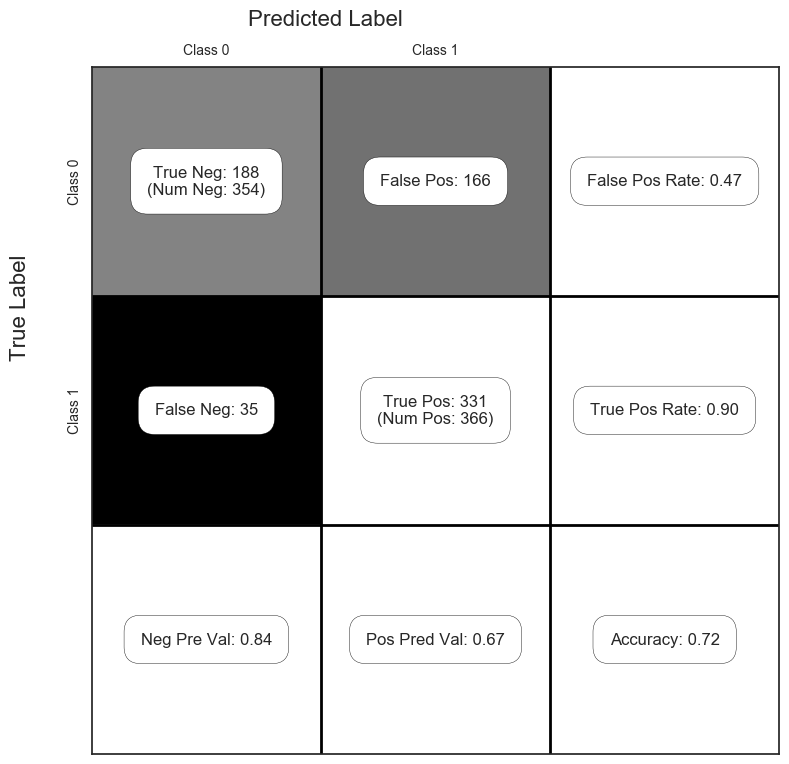

In [63]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [64]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_article, predictions)

Precision Score of Multinomial NB model: 66.60%

AUC: 71.77%

Accuracy Score of Multinomial NB model: 72.08%

Recall Score of Multinomial NB model: 90.44%

F1 Score of Multinomial NB model: 76.71%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.84      0.53      0.65       354
          1       0.67      0.90      0.77       366

avg / total       0.75      0.72      0.71       720



### We have learned that is best to use the balance labels dataset, that using articles is better than headlines (as they have less features) and that CountVectorizer has better metrics than TfidfVectorizer.